# Circuit of Grover's search using Qiskit

This notebook will teach you how to construct your own circuits for the Grover's search using Qiskit.

# Install Qiskit

Install Qiskit if you haven't. Here we are not installing the latest version of Qiskit since it has an issue with displaying circuits using matplotlib (fancy circuits) in Colab.

In [ ]:
!pip install qiskit==0.16.1

# Importing Packages

In [2]:
from qiskit import * # No need to explain why
import matplotlib as mpl # Required to display some fancy circuits

#The circuits

Now, we move on to main part of the notebook. In this section, we shall explain the construction of circuits for Grover's search in a $2$-qubit (4 element database) and a $3$-qubit (8 element database). The search problem can be stated as follows: Let $f: \{0, 1, \dots, N-1 \} \rightarrow \{ 0, 1\}$. Our objective is to find an element in the domain $\omega$, such that $f(\omega) = 1$, using minimum calls to the function $f$. The problem is carried out in a quantum setting by the circuit

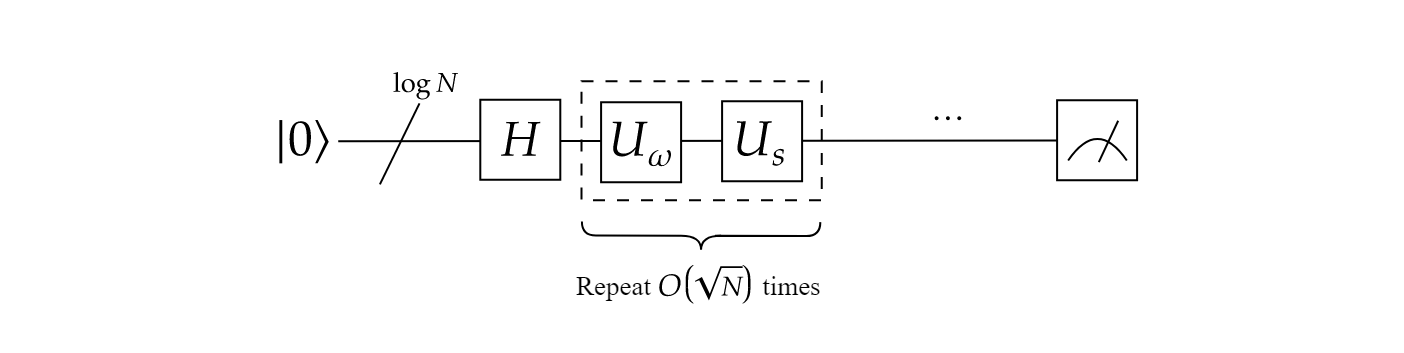

Here, 

\begin{equation}
    U_{\omega}|i\rangle=
    \begin{cases}
      |i\rangle & \text{ if }i \neq \omega \\
      -|i\rangle & \text{ if }i = \omega
    \end{cases}
\end{equation}

\begin{equation}
  U_s = 2|+\rangle^{\otimes\log N} \langle+|^{\otimes\log N} - I_N
\end{equation}

#Case $N = 4$

In this section, we explain the construction and simulation of Grover's search for a boolean function defined on $4$ elements. This would require $\log 4=2$ qubits. The function we are interested in is $f:\{ 0,1,2,3\} \rightarrow \{ 0,1\}$

\begin{equation}
  f(x) = 
  \begin{cases}
    1 & \text{ if } x = 3 \\
    0 & \text{ if }  x \neq 3
  \end{cases}
\end{equation}
In this case, $U_{\omega}$ should be an operator defined as
\begin{equation}
  U_{\omega}|x_1 x_2\rangle = 
  \begin{cases}
    -|x_1 x_2\rangle & \text{ if } x_1 = 1 \ \& \ x_2 = 1 \\
    |x_1 x_2\rangle & \text{ otherwise }
  \end{cases}
\end{equation}

Then in matrix form, $U_{\omega}$ is
\begin{equation}
  U_{\omega}=
  \begin{bmatrix}
    1 & 0 & 0 & 0 \\
    0 & 1 & 0 & 0 \\
    0 & 0 & 1 & 0 \\
    0 & 0 & 0 & -1 
  \end{bmatrix}
\end{equation}

This is the controlled-$Z$ gate.


One can see that the operator $U_s$ does not depend on the function $f$ and it depends only on $N$. When $N=4$ ($2$-qubit case), the circuit for $U_s$ can be seen as

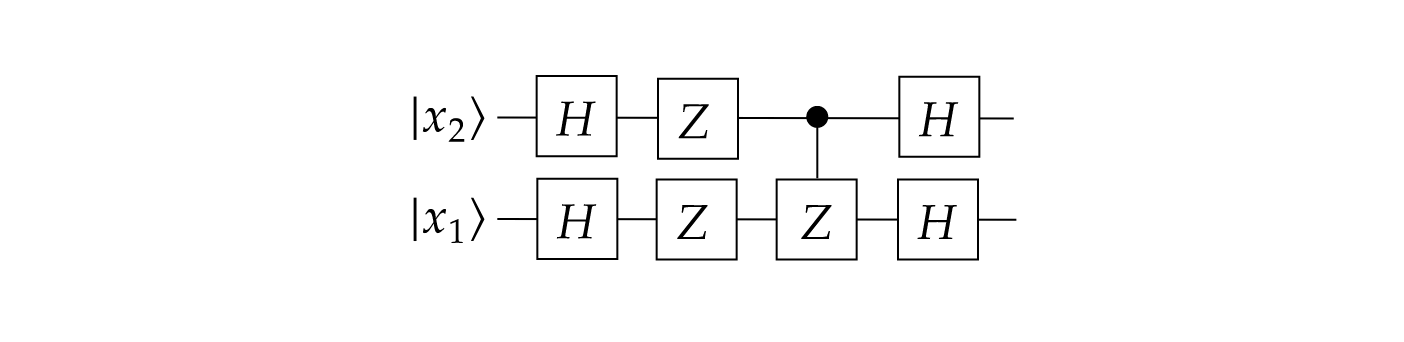

Note that if the domain is $4$ and their is only one satisfiable element in the domain, then a single iteration of $U_{\omega}$ and $U_{s}$ gives the answer $\omega$ as output with $100 \%$ probability. Then, the whole circuit can be seen as 

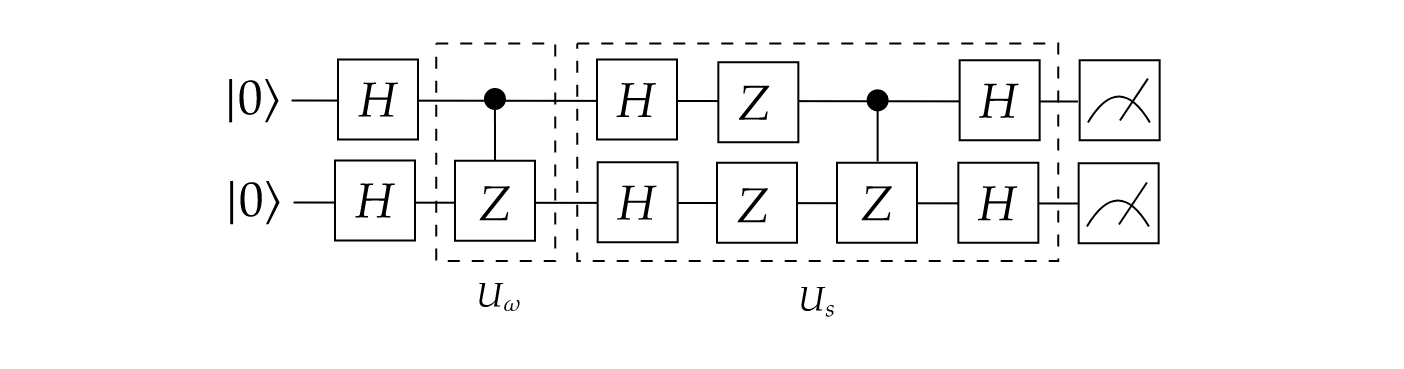

Now, we move on to constructing this circuit using Qiskit

First, we prepare the quantum register. As we can see, from the circuit, the quantum register comprises of 2 qubits. Hence

In [11]:
# Prepare quantum register
qr = QuantumRegister(2)

Next, we shall prepare the classical register which will have the classical output after measurement. Since the circuit only requires measuring two qubits, the classical register requires only two bits. So 

In [12]:
# Prepare classical register
cr = ClassicalRegister(2)

Combining both the quantum and classical registers, we now define the quantum circuit

In [13]:
# Prepare quantum circuit
qc = QuantumCircuit(qr, cr)

Now, we shall start applying the gates.

We start with applying Hadamrd gates to all qubits.

In [14]:
# Apply Hadamard gates on qubits 0 and 1
qc.h(0)
qc.h(1)

Next step is to apply $U_{\omega}$

In [15]:
# Apply controlled-Z gate
qc.cz(0,1)

Let's take a break and look at the circuit we have built so far.

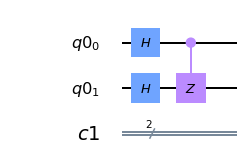

In [16]:
# Display circuit
qc.draw(output = "mpl")

Looks good. Now we shall apply $U_s$.

In [17]:
# Apply U_s
qc.h(0)
qc.h(1)

qc.z(0)
qc.z(1)

qc.cz(0,1)

qc.h(0)
qc.h(1)

Let's take a look at the circuit again.

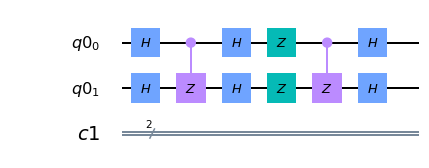

In [18]:
# Display circuit
qc.draw(output = "mpl")

Looks better. Now, we shall measure and simulate the circuit $100$ times.

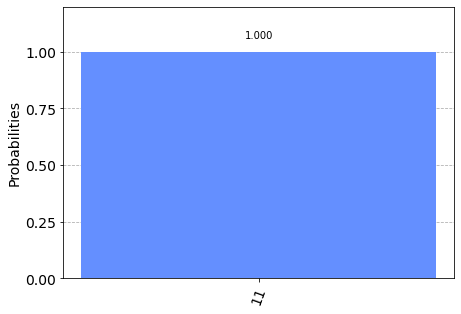

In [19]:
# Measure qubits 0,1
qc.measure(0, 0)
qc.measure(1, 1)
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots = 100)
sim_result = job_sim.result()
counts = sim_result.get_counts(qc)

# Display histogram of output
visualization.plot_histogram(counts)

We see that the result in always $11$. The final circuit is

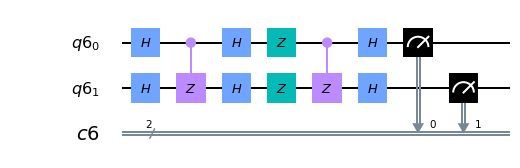

In [ ]:
# Display circuit
qc.draw(output = "mpl")

#Case $N = 8$

In this section, we explain the construction and simulation of Grover's search for a boolean function defined on $8$ elements. This would require $\log 8=3$ qubits. The function we are interested in is $f:\{ 0,1, \dots, 7\} \rightarrow \{ 0,1\}$

\begin{equation}
  f(x) = 
  \begin{cases}
    1 & \text{ if } x = 5 \ \& \ x = 6 \\
    0 & \text{ otherwise } 
  \end{cases}
\end{equation}
In this case, $U_{\omega}$ should be an operator defined as
\begin{equation}
  U_{\omega}|x_1 x_2 x_3\rangle = 
  \begin{cases}
    -|x_1 x_2 x_3\rangle & \text{ if } x_1 x_2 x_3 = 101 \ \& \ x_1 x_2 x_3 = 110 \\
    |x_1 x_2 x_3\rangle & \text{ otherwise }
  \end{cases}
\end{equation}



The operator $U_{\omega}$ can be constructed as

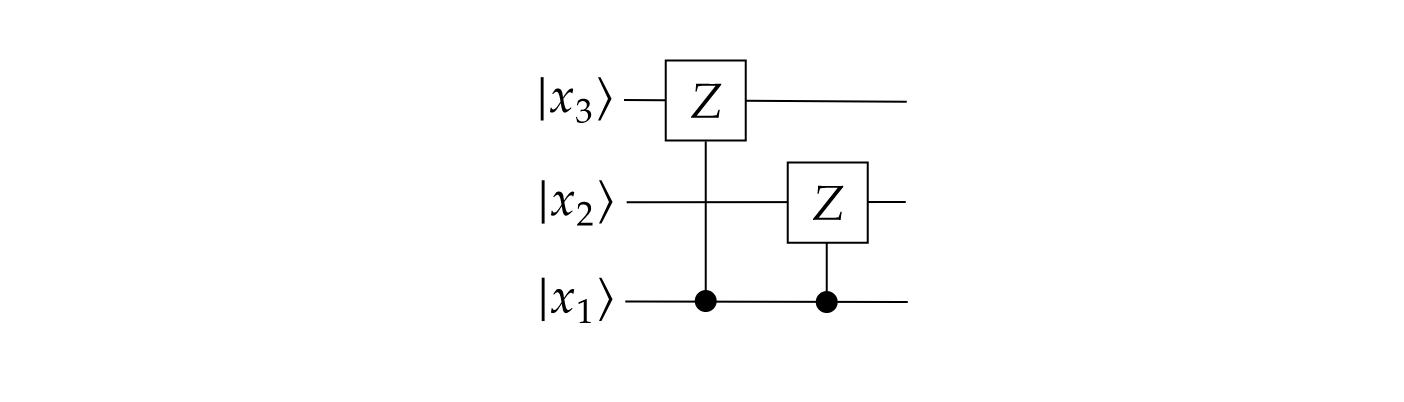

When $N=8$ ($3$-qubit case), the circuit for $U_s$ is

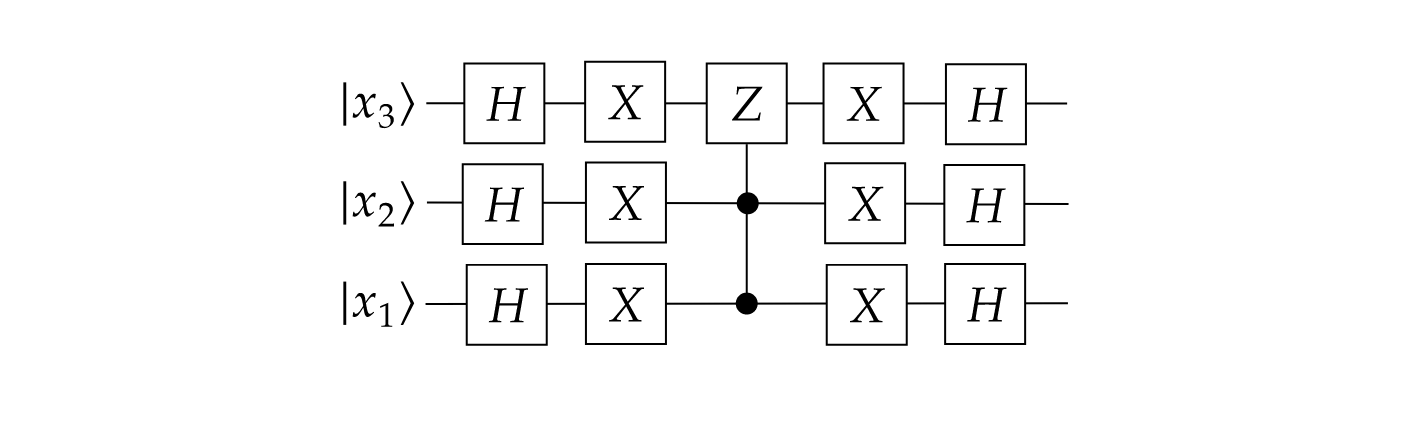

Here also, since the domain has $8$ elements and there are $2$ satisfiable solutions, only one iteration of $U_{\omega}$ and $U_{s}$ is required to obtain one of the solutions with $100 \%$ probability. The final circuit can then be viewed as 

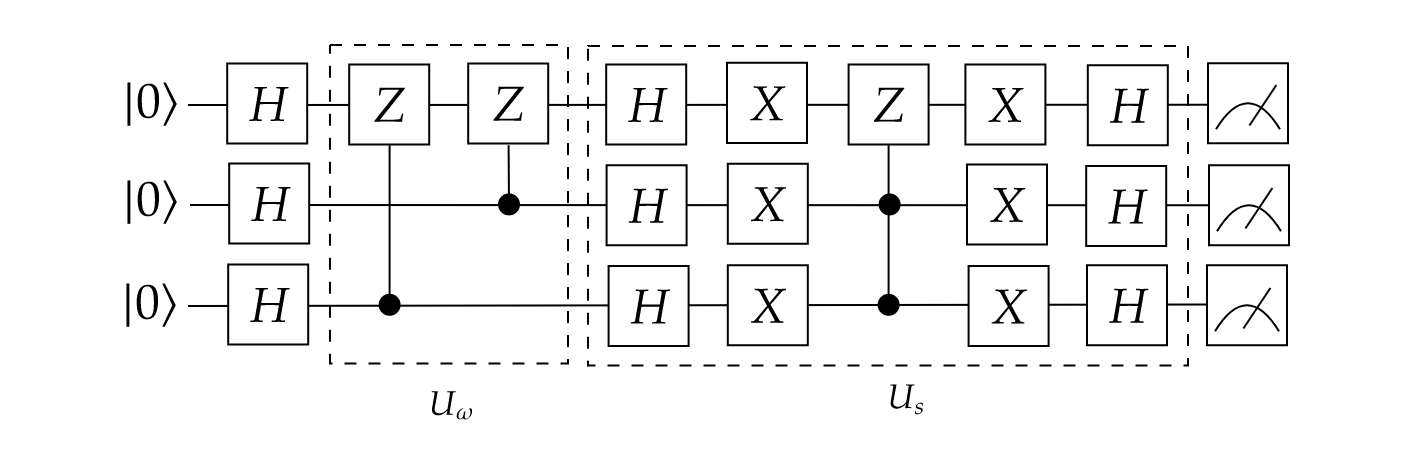

Since constructing and executing the previous circuit was explained in detail, we are not going to explain the construction of this circuit extensively as it is extremely similar to the previous circuit. 

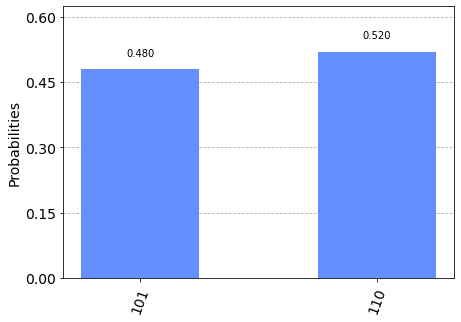

In [ ]:
# Prepare the circuit
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr, cr)

# Apply Hadamard gate on all qubits
qc.h(0)
qc.h(1)
qc.h(2)

# Apply the U_w
qc.cz(2,0)
qc.cz(1,0)

# Apply U_s
qc.h(0)
qc.h(1)
qc.h(2)

qc.x(0)
qc.x(1)
qc.x(2)

qc.h(0)
qc.ccx(2,1,0)
qc.h(0)

qc.x(0)
qc.x(1)
qc.x(2)

qc.h(0)
qc.h(1)
qc.h(2)

# Measure qubits 0,1,2
qc.measure(0, 2)
qc.measure(1, 1)
qc.measure(2, 0)
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots = 100)
sim_result = job_sim.result()
counts = sim_result.get_counts(qc)

# Display histogram of output
visualization.plot_histogram(counts)


We see that all measurements resulted in one of the $2$ solutions. The circuit can be seen as

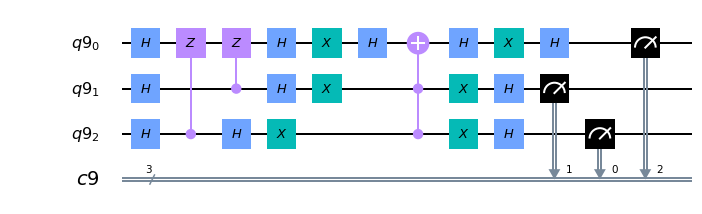

In [ ]:
# Display circuit
qc.draw(output = "mpl")

So far, we have been dealing with cases where the circuit would result in a solution with $100 \%$ probability. In this section, we shall consider a function where the success probability is not $100 \%$. Consider the function $f: \{ 0, 1, \dots, 7\} \rightarrow \{ 0,1\}$ where
\begin{equation}
  f(x) = 
  \begin{cases}
    1 & \text{ if } x = 7 \\
    0 & \text{ otherwise } 
  \end{cases}
\end{equation}

In this case, $U_{\omega}$ should be an operator defined as
\begin{equation}
  U_{\omega}|x_1 x_2 x_3\rangle = 
  \begin{cases}
    -|x_1 x_2 x_3\rangle & \text{ if } x_1 x_2 x_3 = 111 \\
    |x_1 x_2 x_3\rangle & \text{ otherwise }
  \end{cases}
\end{equation}

This means that $U_{\omega}$ is the controled-controlled-$Z$ (CCZ) gate. The same $U_s$ gate we used in the previous case can be used here also.


First, we shall apply $U_{\omega}$ and $U_s$ once and observe the result.

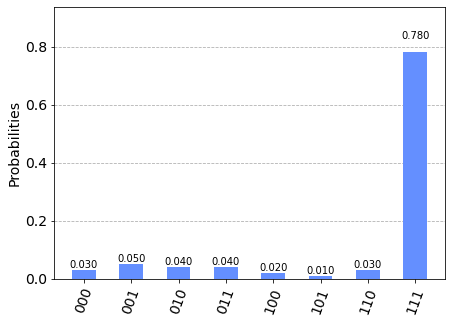

In [ ]:
# Prepare the circuit
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr, cr)

# Apply Hadamard gate on all qubits
qc.h(0)
qc.h(1)
qc.h(2)

# Apply the U_w
qc.h(0)
qc.ccx(2,1,0)
qc.h(0)

# Apply U_s
qc.h(0)
qc.h(1)
qc.h(2)

qc.x(0)
qc.x(1)
qc.x(2)

qc.h(0)
qc.ccx(2,1,0)
qc.h(0)

qc.x(0)
qc.x(1)
qc.x(2)

qc.h(0)
qc.h(1)
qc.h(2)

# Measure qubits 0,1
qc.measure(0, 2)
qc.measure(1, 1)
qc.measure(2, 0)
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots = 100)
sim_result = job_sim.result()
counts = sim_result.get_counts(qc)

# Display histogram of output
visualization.plot_histogram(counts)

We see that the correct answer $111$ occurs around $78 \%$. Before we move on to the next case, we'll take a look at the circuit, becuase we can

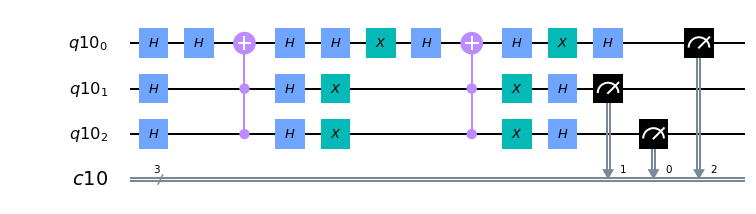

In [ ]:
# Display circuit
qc.draw(output = "mpl")

Ok. In the next case, we shall run $U_{\omega}$ and $U_{s}$ twice and observe the result.

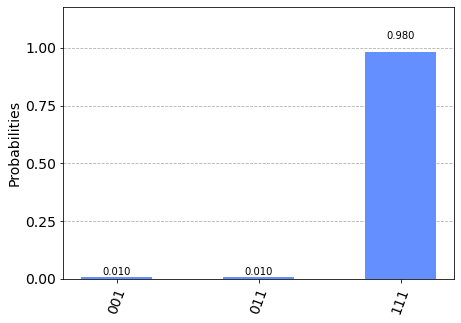

In [ ]:
# Prepare the circuit
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr, cr)

# Apply Hadamard gate on all qubits
qc.h(0)
qc.h(1)
qc.h(2)

for i in range(2):
  # Apply the U_w
  qc.h(0)
  qc.ccx(2,1,0)
  qc.h(0)

  # Apply the U_S
  qc.h(0)
  qc.h(1)
  qc.h(2)

  qc.x(0)
  qc.x(1)
  qc.x(2)

  qc.h(0)
  qc.ccx(2,1,0)
  qc.h(0)

  qc.x(0)
  qc.x(1)
  qc.x(2)

  qc.h(0)
  qc.h(1)
  qc.h(2)

# Measure qubits 0,1
qc.measure(0, 2)
qc.measure(1, 1)
qc.measure(2, 0)
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots = 100)
sim_result = job_sim.result()
counts = sim_result.get_counts(qc)

# Display histogram of output
visualization.plot_histogram(counts)

We see that the correct answer $111$ occurs around $98 \%$ this time. So, the probability of the right answer increases. Again, before we move on to the next case, we'll take a look at the circuit, becuase, again, we can

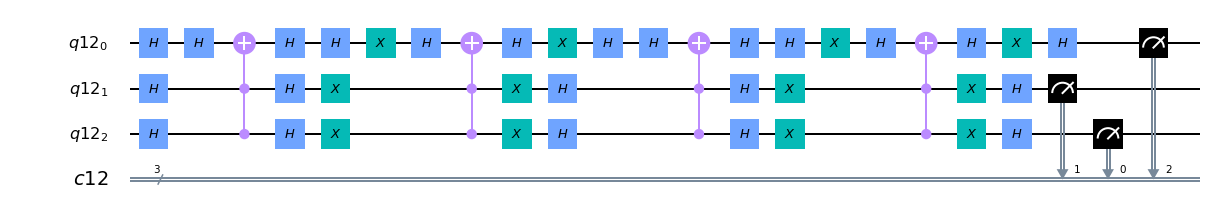

In [ ]:
# Display circuit
qc.draw(output = "mpl")

Ok. In the next case, we shall run $U_{\omega}$ and $U_{s}$ thrice and observe the result. 

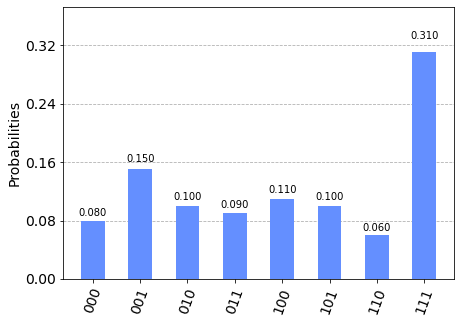

In [ ]:
# Prepare the circuit
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr, cr)

# Apply Hadamard gate on all qubits
qc.h(0)
qc.h(1)
qc.h(2)

for i in range(3):
  # Apply the U_w
  qc.h(0)
  qc.ccx(2,1,0)
  qc.h(0)

  # Apply the U_S
  qc.h(0)
  qc.h(1)
  qc.h(2)

  qc.x(0)
  qc.x(1)
  qc.x(2)

  qc.h(0)
  qc.ccx(2,1,0)
  qc.h(0)

  qc.x(0)
  qc.x(1)
  qc.x(2)

  qc.h(0)
  qc.h(1)
  qc.h(2)

# Measure qubits 0,1
qc.measure(0, 2)
qc.measure(1, 1)
qc.measure(2, 0)
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots = 100)
sim_result = job_sim.result()
counts = sim_result.get_counts(qc)

# Display histogram of output
visualization.plot_histogram(counts)

Interestingly, we see that the correct answer $111$ occurs only around $31 \%$ this time. So, the probability of the right answer has decreased now, which means we have probably started overcooking the circuit. The circuit now looks like this

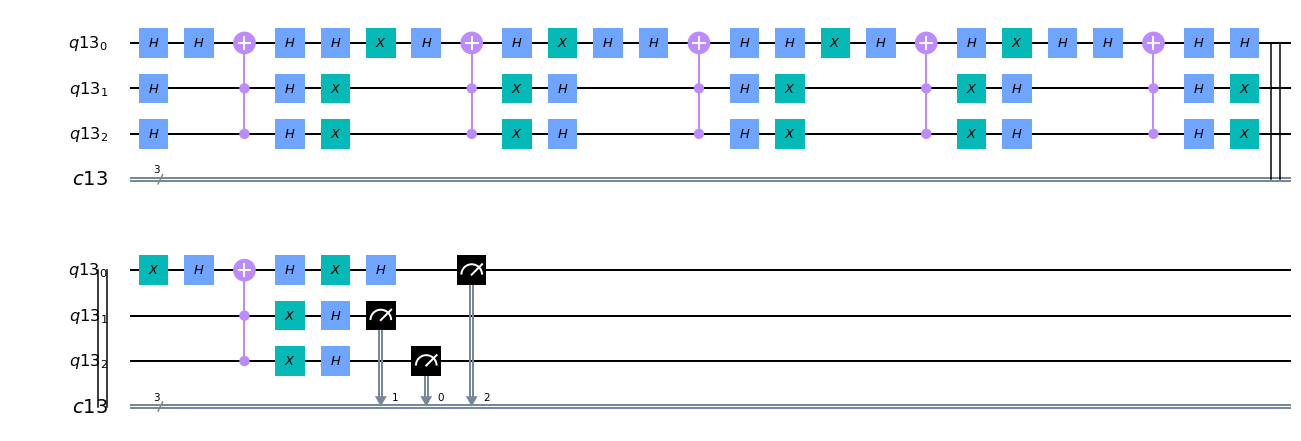

In [ ]:
# Display circuit
qc.draw(output = "mpl")

In the last case, we shall run $U_{\omega}$ and $U_{s}$ four times and observe the result. 

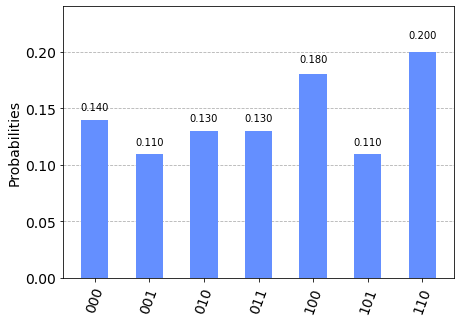

In [ ]:
# Prepare the circuit
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr, cr)

# Apply Hadamard gate on all qubits
qc.h(0)
qc.h(1)
qc.h(2)

for i in range(4):
  # Apply the U_w
  qc.h(0)
  qc.ccx(2,1,0)
  qc.h(0)

  # Apply the U_S
  qc.h(0)
  qc.h(1)
  qc.h(2)

  qc.x(0)
  qc.x(1)
  qc.x(2)

  qc.h(0)
  qc.ccx(2,1,0)
  qc.h(0)

  qc.x(0)
  qc.x(1)
  qc.x(2)

  qc.h(0)
  qc.h(1)
  qc.h(2)

# Measure qubits 0,1
qc.measure(0, 2)
qc.measure(1, 1)
qc.measure(2, 0)
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots = 100)
sim_result = job_sim.result()
counts = sim_result.get_counts(qc)

# Display histogram of output
visualization.plot_histogram(counts)

Now, we see that the correct answer $111$ has never occured. So, we have probably extremely overcooked the circuit. The circuit now looks like this

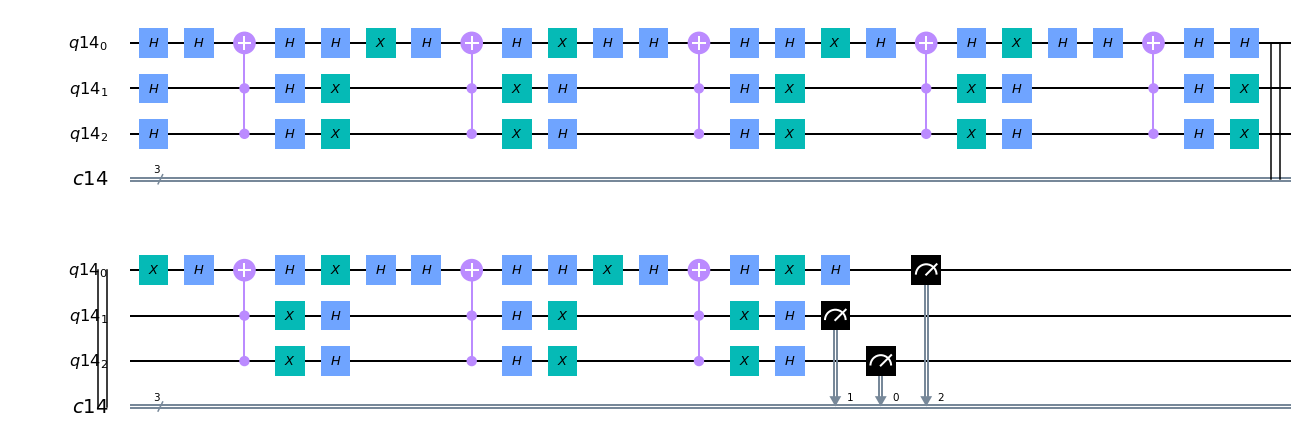

In [ ]:
# Display circuit
qc.draw(output = "mpl")